In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv("Zomato data.csv")
df=pd.DataFrame(data)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

df["rate"]=df["rate"].apply(handleRate)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


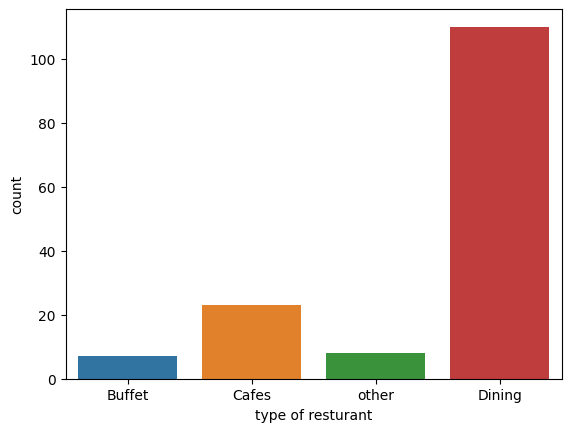

In [ ]:
sns.countplot(df,x="listed_in(type)",hue="listed_in(type)")
plt.xlabel("type of resturant")
plt.show()

Conclusion Most of the resturant are the Dining type Resturant

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


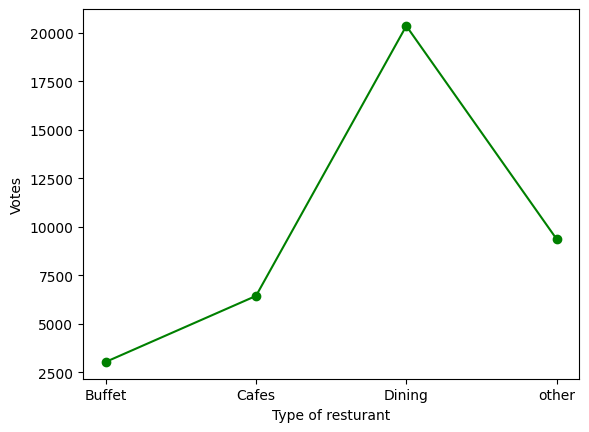

In [ ]:
gb=df.groupby("listed_in(type)")["votes"].sum()
plt.plot(gb.index,gb.values,c="green",marker="o")
plt.xlabel("Type of resturant")
plt.ylabel("Votes")
plt.show()

Highest votes are going to the Dining Resturants

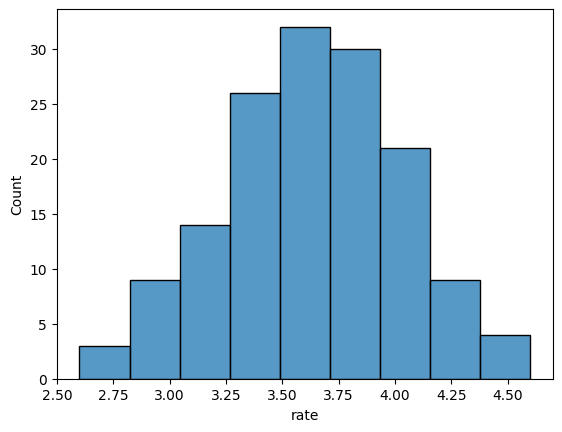

In [ ]:
df.head()
sns.histplot(df,x="rate")
plt.show()

the Majorty of Ratings are the Between 3.5 to 4.0


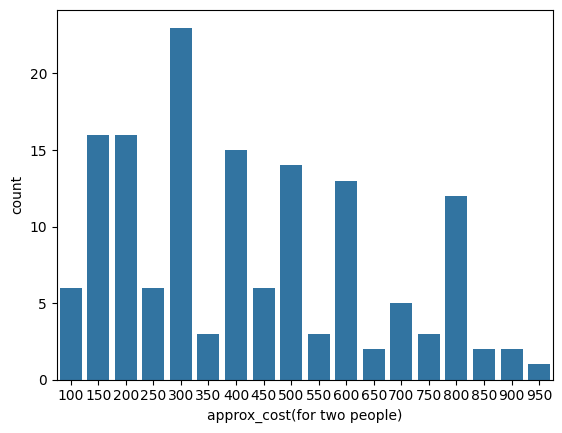

In [ ]:

sns.countplot(df,x="approx_cost(for two people)")

plt.show()

Majority of two people eat food cost 300

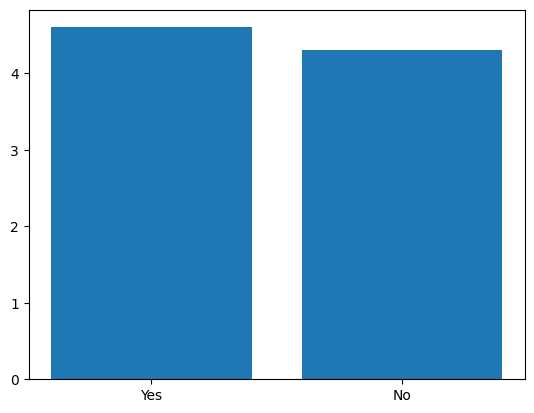

In [ ]:
df.head()

plt.bar(df["online_order"],df["rate"])
plt.show()


the maximum rateing are given on online orders

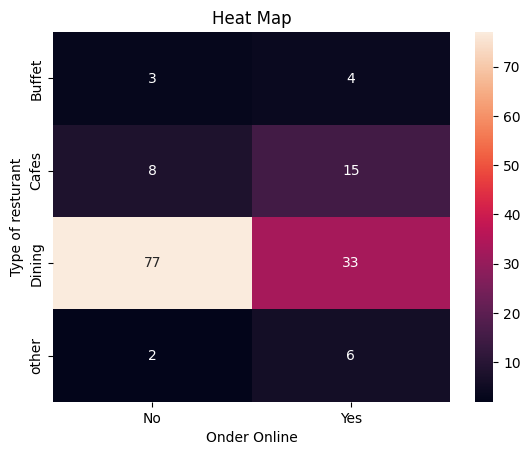

In [ ]:
df.head()
pivot_table=df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True)
plt.title("Heat Map")
plt.xlabel("Onder Online")
plt.ylabel("Type of resturant")
plt.show()

So the most of offline order are going to the Dining type of Resturant.